In [1]:
import pandas as pd
import numpy as np

In [6]:

N = 100000
n = 30000

# normally, ctr is independent of title_length
title_length = np.random.choice(range(25), size=N) + 1
click_through_rate = np.random.beta(5, 100, size=N)

# but one quirky person prefers titles in a much narrower range, and is especially talented
title_length_2 = np.random.normal(13, 3 ,size=n).astype(int)
click_through_rate_2 = np.random.beta(10, 100, size=n)

# let's concatenate these together
all_title_lengths = np.array(list(title_length) + list(title_length_2))
all_click_rates = np.array(list(click_through_rate) + list(click_through_rate_2))

df = pd.DataFrame({'click_through_rate': all_click_rates, 
                   'title_length': all_title_lengths, 
                   'quirky': [0]*N + [1]*n})

# restrict down to where there's enough data
df = df[df.title_length > 0][df.title_length < 25]

/home/akelleh/.virtualenvs/data/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


# First, the naive plot of E[Y|X]:


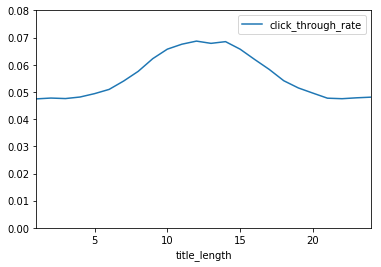

In [10]:

df.groupby('title_length').mean().plot(y='click_through_rate', ylim=(0, 0.08))

# Now let's stratify, estimating E[Y|X, Q=q] for each q

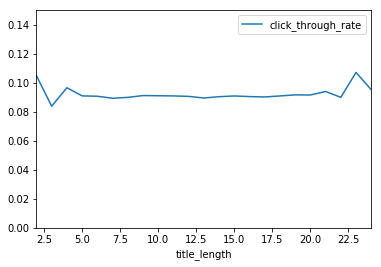

In [12]:
df[df.quirky==1].groupby('title_length').mean().plot(y='click_through_rate', ylim=(0, 0.15))

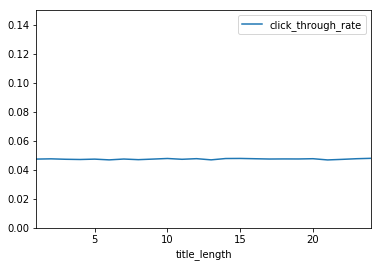

In [13]:
df[df.quirky==0].groupby('title_length').mean().plot(y='click_through_rate', ylim=(0, 0.15))

## Notice that because we have less data density at short and long titles for the Q=1 group, the estimate is much noisier. Let's take a look at the data density now.

quirky
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

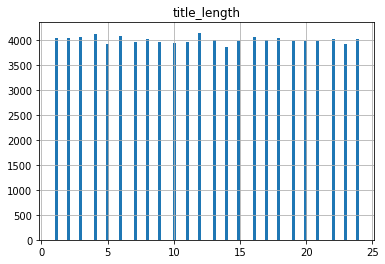

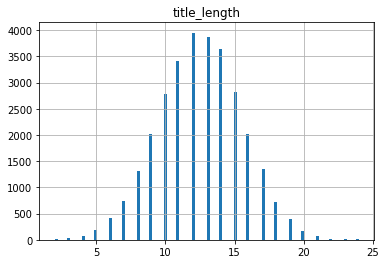

In [19]:
df.groupby('quirky').hist('title_length', bins=100)

## Let's estimate E[Y|do(X)] as $E[Y|do(X)] = \sum_Q E[Y|X, Q]P(Q)$

In [22]:
df.mean()

click_through_rate     0.057758
title_length          12.479358
quirky                 0.237930
dtype: float64

So P(Q=1) = 0.23, and P(Q=0) = 1 - 0.23 = 0.76

In [28]:
#And now our estimate becomes

result = 0.23*df[df.quirky==1].groupby('title_length').mean()['click_through_rate'] \
       + 0.76*df[df.quirky==0].groupby('title_length').mean()['click_through_rate']

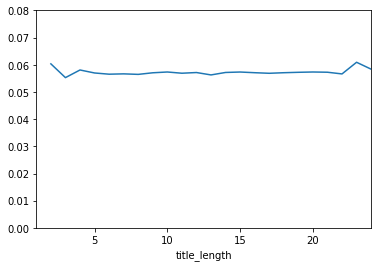

In [30]:
result.plot(ylim=(0,0.08))

# And we've inherited some noise because short and long title lengths for quirky authors are at the edge of the support of the data!

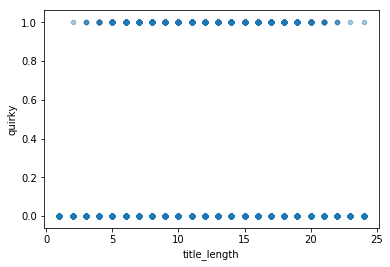

In [37]:
df.plot(x='title_length', y='quirky', kind='scatter', alpha=0.05)